# COGS 108 - Final Project
# TEAM GROUP: 50
# TEAM NAME: Movie Stars

# Names and PID
- Anthony Ostia &emsp; A13903305
- Ramin Atrian &emsp; A15691021
- Chuyang Xiao &emsp; A13722916
- Yifeng Zhang &emsp; A13820262
- Ian Nelson &emsp; A15738482

# Introduction
In this final project of Data science, we are trying to generate a recommendation system of movies for IMDB users with the respect of their historical ratings. At first, after obtaining the datasets about both film's final ratings and individual users' ratings, we would try to combine them together with movieID as the key for further comparisons. Next, by visualizing the collected data, we would study the correlation between individual as well as final ratings of films and film genres. At last, we would use the model we generate to recommend films for each individual user. 

# Background 
Since the beginning of the 20th century, film has been an important recreation to human beings possessing both artistic and commercial significance. Moreover, in the Information Age, rather than being overwhelmed by the gigantic informative flow, film won unprecedented attention from the population with the aid of widespread accessibility to the Internet. Just like Hsu (2014) argued in his essay, in the era of Web 2.0, film critics are no longer privileges limited to professionals yet typical rights to common audiences as well, due to the introduction of film rating websites such as IMDB or Rotten Tomatoes: each audience could comment or grade films online and then share their evaluations and opinions to the public. Consequently, the data collected thereby is not only abundant in quantity, but also diverse in nature, including millions of users’ personal information as well as preference of films. Hence, considering it a perfect dataset to study users’ attributes to films, we would like to focus on the ratings on movie websites in this project.

As increasing audiences begin to consider online ratings as critical criteria to decide whether or  not to see a film, a number of data scientists struggle to explore the rating data, which has provided us with the direction of further research. In the research accomplished by Hsu (2014) focusing on predicting the movies user rating based on the IMDB attributes, by analyzing the ratings and critics of 31506 movies, they generated a mathematical model mimicking the manners of the preference of general IMDB users, and hence predicted the final rating of a newly coming movie via entering related parameters to it. Regardingly, we found that instead of being purely independent, the IMDB ratings of new films could be roughly predicted by past data. Furthermore, in Breuss’s research (2012), the personal information on users’ social media, including gender, hobby, or regular activities, was taken into account and therefore, predicted the IMDB movie ratings they might give, which inspires that individuals’ statistics could also be of concern. 

All in all, in this data science project, we will combine these two studies and step forward: we will study what kind of movies will a user like based on the historical ratings and review texts of that user on movies he/she has seen previously. From our perspective, this study is not only interesting but also quite applicable, could possibly promote the recommendation system in movie rating websites.

Reference:
1. Hsu, P. Y., Shen, Y. H., & Xie, X. A. (2014, October). Predicting movies user ratings with imdb attributes. In International Conference on Rough Sets and Knowledge Technology (pp. 444-453). Springer, Cham.
2. Oghina, A., Breuss, M., Tsagkias, M., & De Rijke, M. (2012, April). Predicting imdb movie ratings using social media. In European Conference on Information Retrieval (pp. 503-507). Springer, Berlin, Heidelberg.

# Research Question
How to recommend films in their favorite genres to each individual IMDB user according to their historical ratings?

# Hypothesis
Within this data science group project, we would like to develope a recommendation systems for the movie rating websites which involves to predict the users' preference in movie according to their rating history and then provide them with certain genre of movies that they favour. Hence, we generated a couple of hypothesises with the respect of this topic:
1. With the respect of the users, one would like to rate higher on the genres (higher than the average) he or she loves, which indicates his or her love. On the opposite, to the genres he or she dislikes, his or hers ratings would be much lower(lower than or equal to the average).
2. Moreover, if a user loves a certain genre of film, he or she tends to watch more this genre of films.
3. If a user loves a certain genre of film, this genre of film must exist among the films he or she rates the highest

# Data Description

In this group project, we would majorly use two datasets, the rating.csv and movie.csv

Dataset name: rating.csv

Reference: https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7#

Number of observations: 80001052

We would only use the rating.csv in this data package. It includes 138493 IMDB users' ratings on films in the past 15 years, and each observation refers to one rating. This dataset would construct the rating history of these users that we are going to study and generate predictive model. The columns of this dataset are:

1. userID: the IMDB ID of this user that made this rating
2. movieID: the movieID of the film got rated in this rating
3. rating: the rating the user gives to the film
4. timestamp: the time this rating is made

In further explorations, we would possibly focus on the information in userID, movieID and rating column.

Dataset name: movie.csv

Reference: https://www.kaggle.com/grouplens/movielens-20m-dataset#tag.csv

Number of observations: 27277

In this dataset, each observation refers to the information of one film in the IMDB collection. The columns of this dataset are:
1. movieID: the movieID of the film, and the reference to the user's ratings
2. title: the title of the film
3. genres: the genres of the film

In further explorations, we would utilize the information in all three columns.


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Setup

In [1]:
#import the useful modules and packages.
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support

In [2]:
# load in our datasets in csv with pandas method.
df_rating = pd.read_csv('rating.csv') 
df_movie = pd.read_csv('movie.csv',dtype = {'title':str, 'genres':str, 'movieId':int})

In [3]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [4]:
df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Data Cleaning / Pre-processing

We drop the timestamp column from the df_rating dataframe. from since it is not beneficial for our project. Then, we drop any data with missing information from the df_rating and df_movie dataframes. Next, we change the scale of the ratings from the rating columns from five to ten by multiplying each rating by 2. Since the information is too large, we decided to create a new dataframe called train that will use the first 2000 users from the df_ratings dataframe. We will then remove any rows that do not have any ratings in the train dataframe. We then create a dataframe called test which takes the last five rows of the train dataframe and drops the index values.Then for both the train and test dataframe, we will create three columns called average score, genre, and variance. In the average score column, we add up all the values for the movie being rated and then divide it by the total amount of ratings for that movie. In the genre column, we put the genre corresponding to the proper movie. Lastly in the variance column, we put the difference between a rating of a movie and the average rating for that movie.

In [5]:
# drop the timestamp column
df_rating = df_rating.drop(columns = ['timestamp'])

In [6]:
# drop data with missing values
df_rating.dropna(inplace=True)
df_movie.dropna(inplace=True)

In [7]:
# convert the original rating in the scale of 5 into the rating in the scale of 10.
df_rating['rating'] *= 2

In [8]:
# The original ratings dataset is too large
# we would select the first 2000 users as our training set
train = df_rating[df_rating['userId']<=2000]

In [9]:
# remove rows without ratings
rows_to_drop = []
for n in range(len(train)):
    if train['movieId'][n] not in df_movie['movieId']:
        rows_to_drop.append(n)

In [10]:
# split the train and test dataset
train = train.drop(rows_to_drop)
frames = [train[train['userId'] == i+1][-5:] for i in range(2000)]
test = pd.concat(frames)
todrop = test.index.values
train = train.drop(todrop)

In [11]:
# calculate the average ratings
average_ratings = {}
for index, row in train.iterrows():
    if row[1] in average_ratings:
        average_ratings[row[1]].append(row[2])
    else:
        average_ratings[row[1]] = [row[2]]
        
average_dict = {}
for key,value in average_ratings.items():
    average_dict[key] = sum(value)/len(value)
    
train['average_score'] = [average_dict[row[1]] for index,row in train.iterrows()]

In [12]:
# append genres to train dataset
genre = []
for i in train['movieId']:
    g = ""
    for val in df_movie[df_movie['movieId'] == i]['genres']:
        g = val
    genre.append(g)
train['genres'] = genre

In [13]:
# calculate variance for each user on each movie
train['variance'] = train.apply(lambda row: row.rating - row.average_score, axis=1)

In [14]:
# calculate average score for the test set
average_ratings = {}
for index, row in test.iterrows():
    if row[1] in average_ratings:
        average_ratings[row[1]].append(row[2])
    else:
        average_ratings[row[1]] = [row[2]]

average_dict = {}
for key,value in average_ratings.items():
    average_dict[key] = sum(value)/len(value)

test['average_score'] = [average_dict[row[1]] for index,row in test.iterrows()]

In [15]:
# append genres to the test set
genre = []
for i in test['movieId']:
    g = ""
    for val in df_movie[df_movie['movieId'] == i]['genres']:
        g = val
    genre.append(g)
test['genres'] = genre

In [16]:
test['variance'] = test.apply(lambda row: row.rating - row.average_score, axis=1)
test['recommend'] = test.apply(lambda row: row.rating >= 6.0, axis=1)

In [17]:
train.head()

,userId,movieId,rating,average_score,genres,variance
0,1,2,7.0,6.484076,Adventure|Children|Fantasy,0.515924
1,1,29,7.0,7.825397,Adventure|Drama|Fantasy|Mystery|Sci-Fi,-0.825397
2,1,32,7.0,7.763955,Mystery|Sci-Fi|Thriller,-0.763955
3,1,47,7.0,8.200632,Mystery|Thriller,-1.200632
4,1,50,7.0,8.773723,Crime|Mystery|Thriller,-1.773723


In [18]:
test.head()

,userId,movieId,rating,average_score,genres,variance,recommend
169,1,8482,7.0,8.000000,Drama|Fantasy|Horror,-1.000000,True
170,1,8507,10.0,8.500000,Crime|Drama|Horror,1.500000,True
171,1,8636,9.0,7.242105,Action|Adventure|Sci-Fi|IMAX,1.757895,True
172,1,8690,7.0,7.000000,Comedy|Drama|Sci-Fi|War,0.000000,True
173,1,8961,8.0,7.568889,Action|Adventure|Animation|Children|Comedy,0.431111,True


In [19]:
# save the train and test dataframe for future use
train.to_csv('train.csv')
test.to_csv('test.csv')

# Data Visualization

##   Graph 1 Scatter matrix of the dataframe

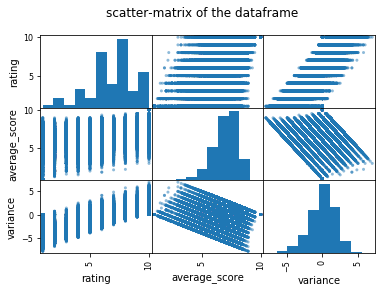

In [20]:
fig = pd.plotting.scatter_matrix(train[['rating','average_score','variance']])
plt.suptitle('scatter-matrix of the dataframe')
fig = plt.gcf()

-The upper left cell of this scatter-matrix is a histogram of the rating given in each user review. Our 1-to-10 scoring system is a result of multiplying ratings on a five-star scale by two. A notable consequence of the original rating system which can be seen in this histogram is that odd ratings in our 1-to-10 system (which correspond to ratings with half-stars in the original system) are less common than even ratings (whole stare ratings). The histogram also shows that the distribution of ratings is skewed to the left. While the odd ratings are less common than the even ones, their shape follows the general shape of the even numbered ratings.
-The middle left cell shows that films of a broad range of average scores are given a wide range of ratings, though high ratings are rarely given to films with very low average scores.
-The center cell is a histogram of the number of ratings films with different ranges of average score have received. This indicates that films with higher average scores tend to be rated by more people.
-The lower left cell shows a plot of film rating vs difference between that rating and the film’s average rating. It shows that the range of variance for lower ratings is greater than the range of variance for higher ratings. This makes sense considering the skewed distribution of ratings observed in the upper left cell.
-The bottom middle cell shows that variance is simply the difference between average score and rating: it is simply a transformation of the top middle graph, which is just a transposition of the middle left graph.
-The bottom right graph is a histogram of variance values. It is skewed to the left, which is to be expected given that the distribution of ratings is skewed to the left.

## Graph 2 Average rating of each genre

In [21]:
score_dict = {}
for index, row in train.iterrows():
    genres = row[4].split('|')
    for gen in genres:
        if gen in score_dict:
            score_dict[gen].append(row[3])
        else:
            score_dict[gen] = [row[3]]

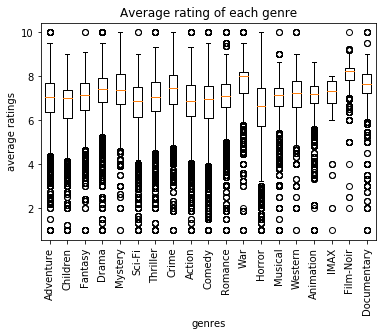

In [22]:
plt.boxplot(score_dict.values())
plt.xticks(list(range(1,20)),score_dict.keys(), rotation=90)
plt.title('Average rating of each genre')
plt.xlabel('genres')
plt.ylabel('average ratings')
fig = plt.gcf()

Consisting with this graph, we could obtain some information about the train dataset we are going to deal with in the coming sections. First and foremost, we could see in the train dataframe, there is no significant variance in the average ratings between the genres within the train dataset, with all their average ratings concentrating around 7 with few spreading in the range between 7 and 8.

Moreover, if we focus on the average rating of each genre, we could see that among the 2000 users we selected, the film noir tends to have the highest average ratings (about 8.4). Moreover, the horror films tend to have the lowest average ratings (about 6.5).

What we could learn from this graph is that the average rating of all film genres do not vary a lot, and the negligible differences in the average rating may not greatly affect further prediction that takes the rating as a predictive factor.


##  Graph 3 Number of films in each genre

In [23]:
count = defaultdict(int)
for index, row in train.iterrows():
    genres = row[4].split('|')
    for gen in genres:
        count[gen] += 1

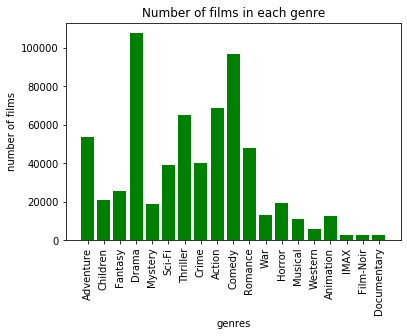

In [24]:
plt.bar(count.keys(), count.values(),color='g')
plt.xticks(rotation=90)
plt.title('Number of films in each genre')
plt.xlabel('genres')
plt.ylabel('number of films')
fig = plt.gcf()

According to the graph above, we can see that in our train dataset, the distribution of the number of each genre of film, far from a prefect equal distribution, is indeed an uneven one: The drama, Comedy, Action and Adventure have the greatest number, while the documentary, Film Noir, IMAX and Western are the most numerically modest ones, and the difference between the maximum and minimum are more than 100000.

This graph provides us with a number of hints for further explorations: since we consider the amount of the film in each genre as one of the predictive factors, we would definitely put this excessively various distribution into consideration, and hence may not use the absolute number of each genre yet the relative proportion of each genre. (for instance, if a user only watch a modest amount of documentary films, it may not indicate that he or she dislikes this genre but it is short in general proportion).


## Graph 4 Number of films each user rates

In [25]:
count_rating = defaultdict(int)
for index, row in train.iterrows():
    count_rating[row[0]] += 1

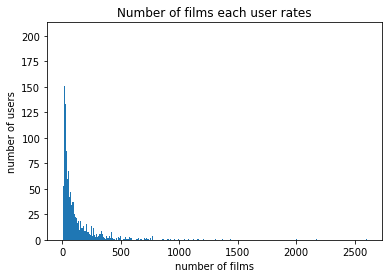

In [26]:
plt.hist(count_rating.values(),bins=500)
plt.title('Number of films each user rates')
plt.xlabel('number of films')
plt.ylabel('number of users')
fig = plt.gcf()

Considering the histogram above, we could see that far from a normal distribution, the number of film users have rated is an extremely positive skewed curve: while most users have only rate around 100 films, the minority rates more than 500 films and an outlier even have rated 2500 films.

Therefore, we could see that the number of films each user has rated varies a lot and outliers do exist, and therefore in the further data exploration, we may further consider the proportion of films in each genre rather than just focus on the absolute number.


## Graph 5 Variance of ratings of each genre of films

In [27]:
variance = defaultdict(float)
for index, row in train.iterrows():
    genres = row[4].split('|')
    for gen in genres:
        variance[gen] += row[5]

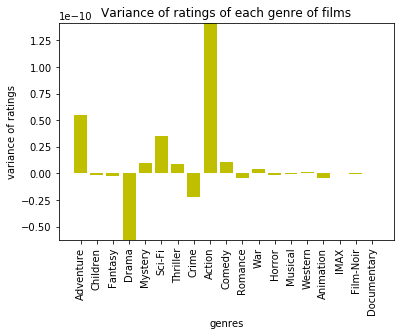

In [28]:
plt.bar(variance.keys(), variance.values(),color='y')
plt.xticks(rotation=90)
plt.title('Variance of ratings of each genre of films')
plt.xlabel('genres')
plt.ylabel('variance of ratings')
fig = plt.gcf()

Regarding the graph above, we could see that the difference between the user's rating and average rating varies a lot between genres. For the action films and adventure films, most users in the train dataset tend to give much higher scores (1.25 and 0.50 higher than the average ratings). Moreover, for the drama and crime films, most users tend to give lower ratings (-0.50 to -0.10). And the rest would have relatively small differences between general ratings and user's ratings.

Therefore, from this distribution we could learn that, in our further predictive model, we shall consider these factors, since sometimes a higher rating on a certain genre of film does not indicate a favour but just an overall phenomenon.


# Data Analysis & Results

In this part, we used three methods to suggest movies to users. The first is the cosine similarity of vectors of genres. We formed a vector of each user containing those genres that user loves most. When suggesting movie, we will compare the cosine similarity of the movie genre vector and the users' preferred genres vector and we will recommend the movie if the two vectors are very close. The second and third methods are classic methods. We find the average rating of each user on each genre and the number of movies each user watches on each genre and generated two dataframes reflecting the data. We predict whether we should recommend a movie based on each user's avarage rating on each genre of movie and how many movies in each genre they watched before, respectively.

### Cosine Similarity

In [29]:
# we define a function to calculate the cosine similarity of two vectors
def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    if magA * magB == 0:
        return 0
    return dotprod / (magA * magB)

In [30]:
# collect the users preferred genres into vectors
users = {}
for index,row in train.iterrows():
    if row[0] in users:
        users[row[0]].extend(row[4].split('|'))
    else:
        users[row[0]] = row[4].split('|')

In [31]:
# eliminate double collected genres
for key in users:
    users[key] = list(set(users[key]))

In [32]:
# the true label
answer = list(test.apply(lambda row: 1 if row.rating >= 6.0 else -1, axis=1))

In [33]:
# the predicted label
pred = []
for index,row in test.iterrows():
    if row[0] not in users:
        pred.append(False)
    else:
        counterA = Counter(users[row[0]])
        counterB = Counter(row[4].split('|'))
        res = counter_cosine_similarity(counterA,counterB)
        if res > 0.3:
            pred.append(1)
        else:
            pred.append(-1)

In [34]:
# accuracy of our model
acc = sum(np.array(pred) == np.array(answer)) / len(answer)
print(acc)

0.7698619171502902


In [35]:
# precision,recall and f1_score of our model
precision,recall,f_score,support = precision_recall_fscore_support(answer,pred,warn_for=())
pre = precision[2]
rec = recall[2]
f1 = f_score[2]

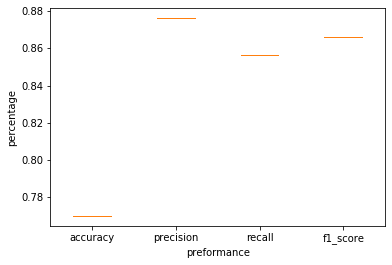

In [36]:
# we use boxplot to plot the accuracy, precision, recall and f1_score
plt.boxplot([[acc],[pre],[rec],[f1]])
plt.xticks(list(range(1,5)),['accuracy','precision','recall','f1_score'])
plt.xlabel('preformance')
plt.ylabel('percentage')
fig = plt.gcf()

The cosine similarity method reaches a pretty high predicting accuracy around 78 percent. This indicates that considering the user's historical movies' genres is a very useful and strong way to recommend movies to them.

### Classic method

### each user's average rating on each genre

In [37]:
# We calculate each user's average rating for each genre of movie
user_rating = defaultdict(list)
genre_rating = defaultdict(list)
last_user = 1
for index, row in train.iterrows():
    if row[0] != last_user:
        user_rating[last_user] = genre_rating
        genre_rating = defaultdict(list)
        last_user = row[0]
    genres = row[4].split('|')
    for gen in genres:
        genre_rating[gen].append(row[3])  

In [38]:
for user,rating in user_rating.items():
    for key,value in rating.items():
        rating[key] = [sum(value)/len(value)]

In [39]:
# integrate each row to form a dataframe
frames = []
for user,rating in user_rating.items():
    data = pd.DataFrame.from_dict(rating)
    frames.append(data)

In [40]:
df_user = pd.concat(frames,sort=False)

In [41]:
# set the index and name of the dataframe
df_user.set_index(pd.Series(list(user_rating.keys())),inplace=True)
df_user.index.name = 'userId'

In [42]:
df_user.head()

,Adventure,Children,Fantasy,Drama,Mystery,Sci-Fi,Thriller,Crime,Action,Comedy,Romance,War,Horror,Musical,Western,Animation,IMAX,Film-Noir,Documentary
userId,,,,,,,,,,,,,,,,,,,
1,6.904455,6.599082,6.714009,7.756397,7.564128,7.117860,7.541193,7.891915,7.174452,7.107212,7.167975,7.627261,7.252730,7.413226,8.072794,6.883448,7.153846,NaN,NaN
2,7.583858,6.800000,7.405844,6.955556,6.645124,7.249075,6.721317,7.605442,7.511103,7.201896,7.140797,7.233164,5.746337,6.358333,7.438098,6.800000,6.800000,7.331361,NaN
3,6.950747,6.582382,7.217240,7.478415,7.198036,6.572171,7.057244,7.602656,6.775073,7.170722,7.461883,8.083648,6.567031,7.332899,7.488070,7.273578,NaN,7.082474,NaN
4,6.950745,7.039604,6.492986,6.828523,6.844158,6.571817,6.757774,6.464301,6.509078,6.391294,7.382287,8.158996,NaN,NaN,6.818533,NaN,NaN,NaN,NaN
5,7.081901,6.969567,6.786151,7.365239,6.899794,7.163044,7.216021,7.757410,7.086818,7.129127,6.915229,8.053777,8.268519,7.122426,7.083804,7.114327,7.546939,NaN,NaN


### the number of films each user watches in each genre

In [43]:
# We calculate the number of each genre of movies each user watches
user_count = defaultdict(list)
genre_count = defaultdict(int)
last_user = 1
for index, row in train.iterrows():
    if row[0] != last_user:
        user_count[last_user] = genre_count
        genre_count = defaultdict(int)
        last_user = row[0]
    genres = row[4].split('|')
    for gen in genres:
        genre_count[gen] += 1 

In [44]:
# integrate each row to from a dataframe
for user,count in user_count.items():
    for key,value in count.items():
        count[key] = [value]
        
frames = []
for user,count in user_count.items():
    data = pd.DataFrame.from_dict(count)
    frames.append(data)

df_count = pd.concat(frames,sort=False)
df_count.set_index(pd.Series(list(user_count.keys())),inplace=True)
df_count.index.name = 'userId'

In [45]:
df_count.head()

,Adventure,Children,Fantasy,Drama,Mystery,Sci-Fi,Thriller,Crime,Action,Comedy,Romance,War,Horror,Musical,Western,Animation,IMAX,Film-Noir,Documentary
userId,,,,,,,,,,,,,,,,,,,
1,71.0,18.0,67.0,40.0,18.0,38.0,41.0,20.0,63.0,39.0,11.0,8.0,42.0,3.0,4.0,9.0,1.0,NaN,NaN
2,14.0,1.0,1.0,19.0,4.0,19.0,18.0,1.0,18.0,9.0,6.0,4.0,16.0,2.0,2.0,1.0,1.0,1.0,NaN
3,49.0,10.0,20.0,56.0,11.0,92.0,50.0,21.0,61.0,49.0,15.0,5.0,32.0,5.0,3.0,4.0,NaN,1.0,NaN
4,5.0,1.0,1.0,7.0,3.0,4.0,12.0,6.0,11.0,10.0,4.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,17.0,11.0,11.0,26.0,2.0,8.0,15.0,7.0,14.0,24.0,15.0,1.0,1.0,8.0,2.0,6.0,3.0,NaN,NaN


### We want to check whether user's highest rating genre matches genres that they watch most

In [46]:
# count how many  user's highest rating genre matches genres that they watch most
count_match = 0
for index, row in df_user.iterrows():
    if row.idxmax() == df_count.loc[index].idxmax():
        count_match += 1

In [47]:
count_match/len(df_user)

0.00501002004008016

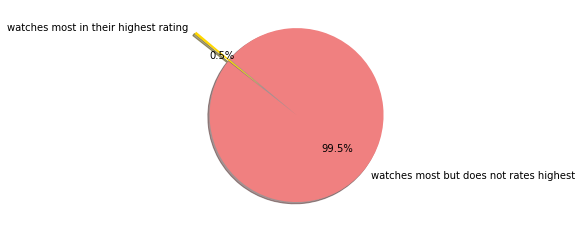

In [48]:
# show the percentage in a pie figure
labels = 'watches most in their highest rating','watches most but does not rates highest'
sizes = [count_match,len(df_user)-count_match]
colors = ['gold', 'lightcoral']
explode = (0.5, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
fig = plt.gcf()

From the above two dataframes we created and the analysis we made, we can find that if a user watches a large number of a certain kind of movie, it does not necessarily mean that they will rate that genre highest.

### Make movie recommendation based on user's highest average rating

In [49]:
# we append those genres that user rates highest to their favorite genre vector
# Here we choose a threshold 7 because after some experiments, we find out that 7 gives the highest accuracy
user_prefer_score = defaultdict(list)
for index,row in df_user.iterrows():
    for i in range(len(row)):
        if row[i] > 7:
            user_prefer_score[index].append(df_user.columns[i])

In [50]:
answer = list(test.apply(lambda row: 1 if row.rating >= 6.0 else -1, axis=1))

In [51]:
# we make recommendation based on user's highest rated genres
pred = []
for index,row in test.iterrows():
    if row[0] not in df_user.index:
        pred.append(-1)
    else:
        if set(user_prefer_score[row[0]]) & set(row[4].split('|')):
            pred.append(1)
        else:
            pred.append(-1)

In [52]:
acc = sum(np.array(pred) == np.array(answer)) / len(answer)
print(acc)

0.7307384430658395


In [53]:
# calculate the precision,recall and f1_score of our model
precision,recall,f_score,support = precision_recall_fscore_support(answer,pred,warn_for=())
pre = precision[1]
rec = recall[1]
f1 = f_score[1]

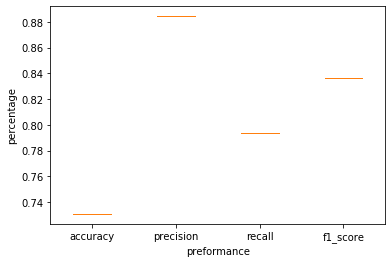

In [54]:
# show the accuracy, precision, recall and f1_score in a pie figure
plt.boxplot([[acc],[pre],[rec],[f1]])
plt.xticks(list(range(1,5)),['accuracy','precision','recall','f1_score'])
plt.xlabel('preformance')
plt.ylabel('percentage')
fig = plt.gcf()

We can observe that making movie recommendation based on user's highest average rating also reaches a pretty high accuracy around 73 precent. That is to say, we have supported our hypothesis that if users love a certain genre of movies, they tend to rate highest among these movies.

### Make movie recommendation based on the genres that user watches most

In [55]:
# We append 5 genres each user watches most to their favorite genre vector
user_prefer_genre = defaultdict(list)
for index,row in df_count.iterrows():
    user_prefer_genre[index] = [df_count.columns[i] for i in sorted(range(len(row)), key=lambda i: row[i])[-5:]]

In [56]:
# we make movie recommendation based on the 5 genres they watch most
pred = []
for index,row in test.iterrows():
    if row[0] not in df_user.index:
        pred.append(-1)
    else:
        if set(user_prefer_genre[row[0]]) & set(row[4].split('|')):
            pred.append(1)
        else:
            pred.append(-1)

In [57]:
acc = sum(np.array(pred) == np.array(answer)) / len(answer)
print(acc)

0.5986591955173104


In [58]:
# calculate the precision,recall and f1_score of our model
precision,recall,f_score,support = precision_recall_fscore_support(answer,pred,warn_for=())
pre = precision[1]
rec = recall[1]
f1 = f_score[1]

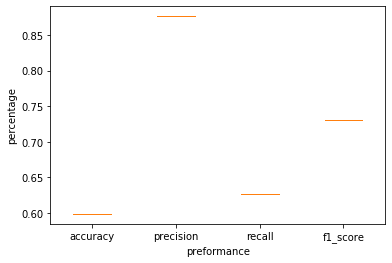

In [59]:
# show the accuracy, precision, recall and f1_score in a pie figure
plt.boxplot([[acc],[pre],[rec],[f1]])
plt.xticks(list(range(1,5)),['accuracy','precision','recall','f1_score'])
plt.xlabel('preformance')
plt.ylabel('percentage')
fig = plt.gcf()

We can find that making movie recommendation based on the genres that user watches most gives a relatively low accuracy. This is a very interesting finding. That is to say, users do not necessarily love those movies most that they watch most. If they watch a lot of a certain genre of movies, they not necessarily give high rates to them. That contradicts our hypothoesis that if users love a genre of movies, they would watch more of them. This phenomenon is understandable since it is kind of hard for users to always watch a movie among their favorites. Most of the time the movies they watch are not their favorites.

# Ethics and Privacy

When it comes to privacy and ethical considerations, there are many factors that we have to consider in order for our project to meet these expectations. 
 
First and foremost, we insured that we are using information that is valid and not leaving out any information that would change the outcome. We want to make sure that we are not using any false information so that our project provides a more precise reflection. 
 
Secondly, since the datasets we employed in our project come from Kaggle, a public platform of free datasets, we are sure that we have permission from the websites that we are taking information from. We want the readers of our project to see that we had help from rating websites and to give them the credit that they deserve. This project goes through the necessary procedures to be fair to rating websites as well as have their trust. 
Thirdly, we need to make sure that we are upholding the privacy of the user’s information from the website. In order to do this, we took out any personal information such as name, age, gender, etc. and labeled them using an id system. This insures that we are only using the necessary information for the experiment without breaking the privacy of the website and its users. 
Lastly, we want to make sure that we are not breaking any laws as well as not hurt the users or website in any way. Overall, the project will provide information that will be beneficial towards people that want to see ratings correlate with their favorite type of film. If we are able to get approval from others, others may try to build up from our project.



# Conclusion and Discussion

With our information, we are able to determine that the users rated movies they liked would match their passion and rated the movies they did not like would not match their passion. 

In this project we posed and tested three hypotheses.
The first hypothesis is that a user will rate their favorite genre higher than the average for that genre (their favorite genre being the genre they give the highest ratings compared to other genres), and rate genres lower than average in their least favorite genre (the genre they give the lowest ratings to) that the films belonging to the genre that a user rates most highly will  a user will tend to rate films higher than the average of all users. This hypothesis is supported by our analysis: we found this to be true for 65% of users.
The second hypothesis is if a user loves a certain genre of film, he or she tends to rate this genre of movies more. Our analysis does not support this hypothesis: this is true for only 47% of users goes against this hypothesis as only a small percentage of people tend to watch a movie that is a genre that they love.



In our analysis, we decided to do cosine similarity which allows us to *insert info about this* as well as using a classic method that calculates each user's average rating for each genre of movie and number of genres of movies each user rated.
 

One limitation to our analysis lies in our choice of sample population from the user database. Rather than using a random sample of the users, we used the first 2000 users in the database - presumably the earliest adopters of the source movie rating website, who are more possibly more zealous movie fans. This bias in sampling may therefore leads to inaccuracy in the predictive model. As a result, our conclusions can only be generalized to the entire user base provided that one takes as given the assumption that user film rating behavior is independent from registration date on the website. Thus, next time when generating the train dataset, we would possibly try the random sampling that random selects users to construct the train model in order to minimize such bias. Besides, another limitation is that due to the absence of average ratings of each film in the dataset, we have to calculate the average rating from our sample. Therefore, as our calculation may differ from the algorithm of IMDB website, the actual movie average ratings may hence different. Consequently, we may try to find a more comprehensive dataset next time.

An impact that this project will have is that it will help people understand that people will tend to rate movies higher if it falls under their passion. Furthermore, our findings, though still incomplete, is also helpful in real practices, and one of its applications is the movie recommendation system of the movie websites. They could consider the extent of significance of the predictive factors we studied and hence recommend films according to the users’ rating histroy.

In the future, we can improve our project by taking more factors into consideration to create the movie recommendation system. For example, in this project, we only considered the genres in the method of cosine similarity. In fact, we can also take in the director of the movie, the original country of the movie as well as the plot of the movie into the vectors we compare. We can form bag of words based on these information and do natural language processing through tfidf feature to find the most important parts that determines user's favor.